In [ ]:
#Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
!pip install -q kaggle
from  google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"pathikshasivaneshan","key":"d870c7ab5f7bc412a8642892767d3f6d"}'}

In [1]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [2]:
!kaggle datasets download -d iamsouravbanerjee/animal-image-dataset-90-different-animals


Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals
License(s): other
100% 653M/656M [00:05<00:00, 120MB/s] 
100% 656M/656M [00:05<00:00, 126MB/s]


In [3]:
!unzip "/content/animal-image-dataset-90-different-animals.zip"

Streaming output truncated to the last 5000 lines.
  inflating: animals/animals/bison/73b10839bc.jpg  
  inflating: animals/animals/bison/74dc1dd32a.jpg  
  inflating: animals/animals/bison/75ab166a7d.jpg  
  inflating: animals/animals/bison/79e1610d01.jpg  
  inflating: animals/animals/bison/7ba5eee91f.jpg  
  inflating: animals/animals/bison/7d214aab4b.jpg  
  inflating: animals/animals/bison/7f2ef9ab03.jpg  
  inflating: animals/animals/bison/82ec723a4f.jpg  
  inflating: animals/animals/bison/85e145af6c.jpg  
  inflating: animals/animals/bison/862e2c6379.jpg  
  inflating: animals/animals/bison/87a5c700ad.jpg  
  inflating: animals/animals/bison/88b723ce90.jpg  
  inflating: animals/animals/bison/8c3af742c3.jpg  
  inflating: animals/animals/bison/8e34044b98.jpg  
  inflating: animals/animals/bison/8e6adbdc40.jpg  
  inflating: animals/animals/bison/8fce80d5ba.jpg  
  inflating: animals/animals/bison/961a895686.jpg  
  inflating: animals/animals/bison/984a5b583d.jpg  
  inflating: 

In [4]:
import tensorflow as tf  # Import TensorFlow

# Check if GPU is available
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [5]:
import os

DIR = '/content/animals/animals'  # Updated path

# Print the current working directory
print("Current working directory:", os.getcwd())

# List the contents of the '/content/' directory to check if the path exists
print("Contents of '/content/':", os.listdir('/content/'))

# Check if the updated path exists
if os.path.exists(DIR):
    classes = [i for i in os.listdir(DIR) if '.' not in i]  # Creating classes
    print("Classes:", classes)
else:
    print(f"The directory {DIR} does not exist.")


Current working directory: /content
Contents of '/content/': ['.config', 'animal-image-dataset-90-different-animals.zip', 'animals', 'name of the animals.txt', 'sample_data']
Classes: ['porcupine', 'possum', 'squid', 'moth', 'donkey', 'lion', 'raccoon', 'butterfly', 'oyster', 'squirrel', 'fox', 'sheep', 'goat', 'turtle', 'coyote', 'goldfish', 'woodpecker', 'elephant', 'hippopotamus', 'octopus', 'lobster', 'swan', 'antelope', 'hummingbird', 'dragonfly', 'starfish', 'tiger', 'hornbill', 'mouse', 'koala', 'cow', 'rhinoceros', 'seal', 'wombat', 'crow', 'fly', 'dog', 'gorilla', 'bee', 'duck', 'horse', 'zebra', 'rat', 'reindeer', 'ox', 'otter', 'caterpillar', 'cockroach', 'pigeon', 'beetle', 'sandpiper', 'boar', 'grasshopper', 'turkey', 'hamster', 'goose', 'hyena', 'deer', 'leopard', 'sparrow', 'okapi', 'wolf', 'parrot', 'pig', 'dolphin', 'whale', 'badger', 'bat', 'owl', 'bear', 'flamingo', 'cat', 'shark', 'seahorse', 'eagle', 'chimpanzee', 'mosquito', 'orangutan', 'hedgehog', 'jellyfish', '

In [6]:
import pandas as pd

In [7]:
label = []
path = []

for dirname, _,filenames in os.walk(DIR):
    for filename in filenames:
        if os.path.splitext(filename)[-1]=='.jpg':               # If filename contains .png
            if dirname.split()[-1]!='GT':
                label.append(os.path.split(dirname)[-1])
                path.append(os.path.join(dirname,filename))

# Create df
df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

In [8]:
df.head()



,path,label
0,/content/animals/animals/porcupine/1edd89cffe.jpg,porcupine
1,/content/animals/animals/porcupine/1d7f7eddfc.jpg,porcupine
2,/content/animals/animals/porcupine/3eef52fe2e.jpg,porcupine
3,/content/animals/animals/porcupine/81aba6691a.jpg,porcupine
4,/content/animals/animals/porcupine/6cae634b49.jpg,porcupine


In [ ]:
df.tail()

,path,label
5395,/content/animals/animals/bison/74dc1dd32a.jpg,bison
5396,/content/animals/animals/bison/7f2ef9ab03.jpg,bison
5397,/content/animals/animals/bison/8c3af742c3.jpg,bison
5398,/content/animals/animals/bison/3caa994e3d.jpg,bison
5399,/content/animals/animals/bison/3d657e1eb5.jpg,bison


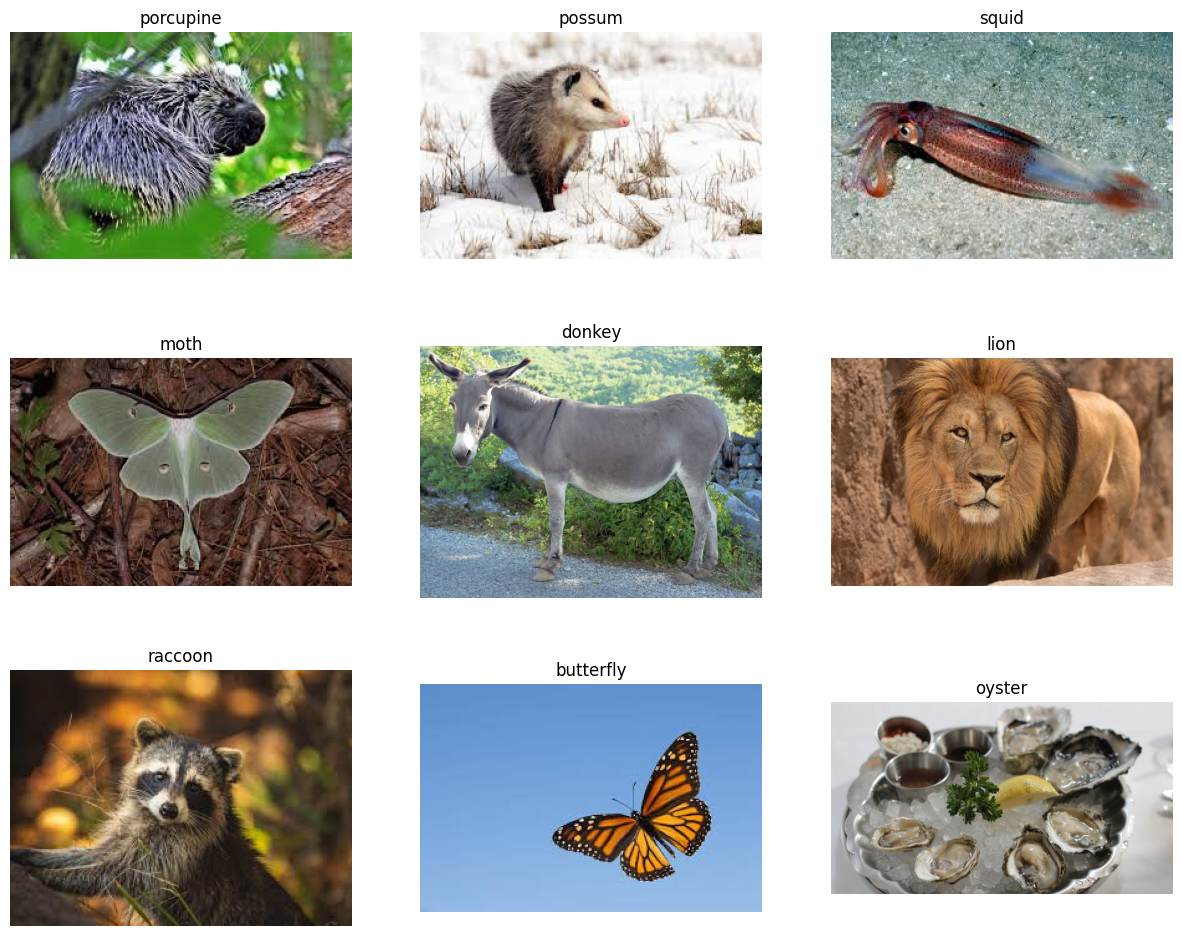

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

idx = 0
num_cols = 3  # Number of columns in the subplot grid
num_rows = 3  # Number of rows in the subplot grid
plt.figure(figsize=(15,12))

for unique_label in df['label'].unique():
    if idx < num_cols * num_rows:  # Check if we still have space in the grid
        plt.subplot(num_rows, num_cols, idx+1)
        plt.imshow(plt.imread(df[df['label']==unique_label].iloc[0,0]))
        plt.title(unique_label)
        plt.axis('off')
        idx+=1
    else:
        break  # Stop plotting if the grid is full


In [ ]:
from sklearn.model_selection import train_test_split

#Train Test Split
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)

In [ ]:
#Check shape of df
print(train_df.shape)
print(test_df.shape)

(4320, 2)
(1080, 2)


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='validation' )
test_images = test_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False )

Found 3456 validated image filenames belonging to 90 classes.
Found 864 validated image filenames belonging to 90 classes.
Found 1080 validated image filenames belonging to 90 classes.


In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Change the class_mode to 'sparse' to use integer labels
train_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='sparse', batch_size=32, shuffle=True, seed=42, subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='sparse', batch_size=32, shuffle=True, seed=42, subset='validation' )
test_images = test_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='sparse', batch_size=32, shuffle=False )

#Change the loss function to sparse_categorical_crossentropy to work with integer labels
pretrained_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = pretrained_model.fit(train_images,
                    validation_data=val_images,
                    epochs=3)

Found 3456 validated image filenames belonging to 90 classes.
Found 864 validated image filenames belonging to 90 classes.
Found 1080 validated image filenames belonging to 90 classes.
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 252ms/step - accuracy: 1.1431e-04 - loss: 12.8726 - val_accuracy: 0.0023 - val_loss: 13.0203
Epoch 2/3
108/108 ━━━━━━━━━━━━━━━━━━━━ 25s 219ms/step - accuracy: 4.1780e-04 - loss: 12.9080 - val_accuracy: 0.0023 - val_loss: 13.0203
Epoch 3/3
108/108 ━━━━━━━━━━━━━━━━━━━━ 40s 220ms/step - accuracy: 6.7209e-04 - loss: 12.9551 - val_accuracy: 0.0023 - val_loss: 13.0203


In [ ]:
pretrained_model.save('test_model.h5')

In [ ]:
import pandas as pd  # Import the pandas library

# Sample data
data = {'col1': [1, 2, 3], 'col2': [4, 5, 6]}

# Create the DataFrame
df = pd.DataFrame(data)

# Now you can call describe
df.describe()

,col1,col2
count,3.0,3.0
mean,2.0,5.0
std,1.0,1.0
min,1.0,4.0
25%,1.5,4.5
50%,2.0,5.0
75%,2.5,5.5
max,3.0,6.0


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/test_model.h5')


In [ ]:
image_dir = '/content/animals/animals'

# List all files in the directory
images = os.listdir(image_dir)
print(f"Found {len(images)} images in the directory.")

# Check if images are being processed
if len(images) == 0:
    print("No images found. Please check the directory path.")
else:
    print(images[:10])  # Print the first 10 images as a sample


Found 90 images in the directory.
['dolphin', 'butterfly', 'antelope', 'bee', 'zebra', 'grasshopper', 'donkey', 'hare', 'raccoon', 'bat']


In [ ]:
image_dir = '/content/animals/animals'


In [ ]:
import os

# Print the current working directory to ensure you're in the right location
print("Current working directory:", os.getcwd())

# List files in the specified directory
print("Files in the directory:", os.listdir(image_dir))


Current working directory: /content
Files in the directory: ['dolphin', 'butterfly', 'antelope', 'bee', 'zebra', 'grasshopper', 'donkey', 'hare', 'raccoon', 'bat', 'jellyfish', 'eagle', 'coyote', 'goldfish', 'cockroach', 'kangaroo', 'okapi', 'cow', 'reindeer', 'seahorse', 'whale', 'sandpiper', 'tiger', 'horse', 'possum', 'porcupine', 'duck', 'ladybugs', 'fox', 'parrot', 'chimpanzee', 'dragonfly', 'deer', 'bison', 'hummingbird', 'hamster', 'starfish', 'fly', 'hedgehog', 'flamingo', 'lion', 'hornbill', 'pigeon', 'panda', 'turtle', 'crow', 'mouse', 'pig', 'snake', 'moth', 'boar', 'dog', 'woodpecker', 'shark', 'squid', 'sheep', 'pelecaniformes', 'gorilla', 'goose', 'orangutan', 'owl', 'hyena', 'seal', 'mosquito', 'elephant', 'hippopotamus', 'lizard', 'bear', 'leopard', 'rat', 'turkey', 'crab', 'rhinoceros', 'wombat', 'penguin', 'caterpillar', 'oyster', 'squirrel', 'koala', 'lobster', 'sparrow', 'cat', 'badger', 'swan', 'otter', 'octopus', 'ox', 'goat', 'beetle', 'wolf']


In [ ]:
supported_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')

# Or if your images have a different extension, add it to the list:
# supported_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.webp', '.gif')


In [ ]:
image_dir = r'C:\Users\pathi\Desktop\sample coding\images'


In [ ]:
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# List files and directories in 'My Drive'
base_dir = '/content/drive/My Drive'
print("Contents of 'My Drive':", os.listdir(base_dir))

# Check contents of subdirectories
sub_dir = '/content/animals/animals'  # Replace with your actual directory name
image_dir = os.path.join(base_dir, sub_dir)
print("Contents of your image directory:", os.listdir(image_dir))




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Contents of 'My Drive': ['Getting started.pdf', 'Pathiksha ', 'IT11023_ITBIN-2110-0081 .pdf', 'PFP ITBIN-2110-0081.c', 'ITCF ITBIN-2110-0081 .pdf', 'EGB ITBIN-2110-0081 .pdf', 'Stipend-HORIZON200080803458.pdf', 'DM ITBIN-2110-0081 .pdf', 'LCS ITBIN-2110-0081 .pdf', '    PSY ITBIN-2110-0081.  pdf.pdf', 'PSY ITBIN-2110-0081 .pdf', 'ITBIN-2110-0081 ', 'ITBIN-2110-0081 .pdf', 'Sivaneshan Pathiksha_ITBIN_2110_0081_Practical Question.pdf', 'ITBIN_2110_0081_10_EAP_1 .pdf', 'ITBIN-2110-0081.html', 'Emerging Technologies-ITBIN-2110-0081.pdf', 'Sivaneshan Pathiksha _ITBIN-2110-0081 _Assignment 2.pdf', 'ITBIN-2110-0081 NEWSLETTER.pdf', 'Luxi', 'Me', 'Screenshots', 'Colab Notebooks', 'New', 'data mining']
Contents of your image directory: ['dolphin', 'butterfly', 'antelope', 'bee', 'zebra', 'grasshopper', 'donkey', 'hare', 'raccoon', 'bat', 'jellyfish', 'eagle', 'coyote'

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('test_model.h5')


In [ ]:
# Use the model to make predictions on the test data
predictions = model.predict(test_images)


34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 296ms/step


In [ ]:
# Convert probabilities into predicted labels
predicted_labels = predictions.argmax(axis=1)


In [ ]:
# Print the class mapping to verify its contents
print(train_images.class_indices)


{'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'hummingbird': 39, 'hyena': 40, 'jellyfish': 41, 'kangaroo': 42, 'koala': 43, 'ladybugs': 44, 'leopard': 45, 'lion': 46, 'lizard': 47, 'lobster': 48, 'mosquito': 49, 'moth': 50, 'mouse': 51, 'octopus': 52, 'okapi': 53, 'orangutan': 54, 'otter': 55, 'owl': 56, 'ox': 57, 'oyster': 58, 'panda': 59, 'parrot': 60, 'pelecaniformes': 61, 'penguin': 62, 'pig': 63, 'pigeon': 64, 'porcupine': 65, 'possum': 66, 'raccoon': 67, 'rat': 68, 'reindeer': 69, 'rhinoceros': 

In [ ]:
# Load the trained model
model = load_model('test_model.h5')

# Make predictions on test data
predictions = model.predict(test_images)

# Get the predicted labels (numeric indices)
predicted_labels = predictions.argmax(axis=1)

# Check the class-to-index mapping
print(train_images.class_indices)

# Create an inverse mapping from numeric labels back to class names
inverse_label_map = {v: k for k, v in train_images.class_indices.items()}

# Convert the predicted labels to class names
predicted_class_names = [inverse_label_map.get(label, 'unknown') for label in predicted_labels]

# Display the predicted class names
print(predicted_class_names)



34/34 ━━━━━━━━━━━━━━━━━━━━ 12s 284ms/step
{'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'hummingbird': 39, 'hyena': 40, 'jellyfish': 41, 'kangaroo': 42, 'koala': 43, 'ladybugs': 44, 'leopard': 45, 'lion': 46, 'lizard': 47, 'lobster': 48, 'mosquito': 49, 'moth': 50, 'mouse': 51, 'octopus': 52, 'okapi': 53, 'orangutan': 54, 'otter': 55, 'owl': 56, 'ox': 57, 'oyster': 58, 'panda': 59, 'parrot': 60, 'pelecaniformes': 61, 'penguin': 62, 'pig': 63, 'pigeon': 64, 'porcupine': 65, 'possum': 66, 'raccoon': 67,

In [ ]:
# Step 1: Load the model
model = load_model('test_model.h5')

# Step 2: Make predictions
predictions = model.predict(test_images)

# Step 3: Get the predicted labels
predicted_labels = predictions.argmax(axis=1)

# Step 4: Map numerical predictions to class names
label_map = train_images.class_indices
inverse_label_map = {v: k for k, v in label_map.items()}
predicted_class_names = [inverse_label_map.get(label, 'unknown') for label in predicted_labels] # Use the .get method to handle missing keys. If a key is not found, it returns 'unknown'

# Step 5: Display predictions
print(predicted_class_names)


34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step
['unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'badger', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'badger', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'fly', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unkno

In [ ]:
@app.post("/predict")
async def predict(file: UploadFile):
    # Code for processing the image
    image = process_image(file)

    # Make a prediction using the model
    prediction = model.predict(image)

    # Return the prediction
    return {"prediction": "bird"}  # This could be hardcoded, hence always returning "bird"


NameError: name 'app' is not defined